# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

    Iliass LASRI

## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

In [175]:
%matplotlib inline

In [176]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


<Figure size 640x480 with 0 Axes>

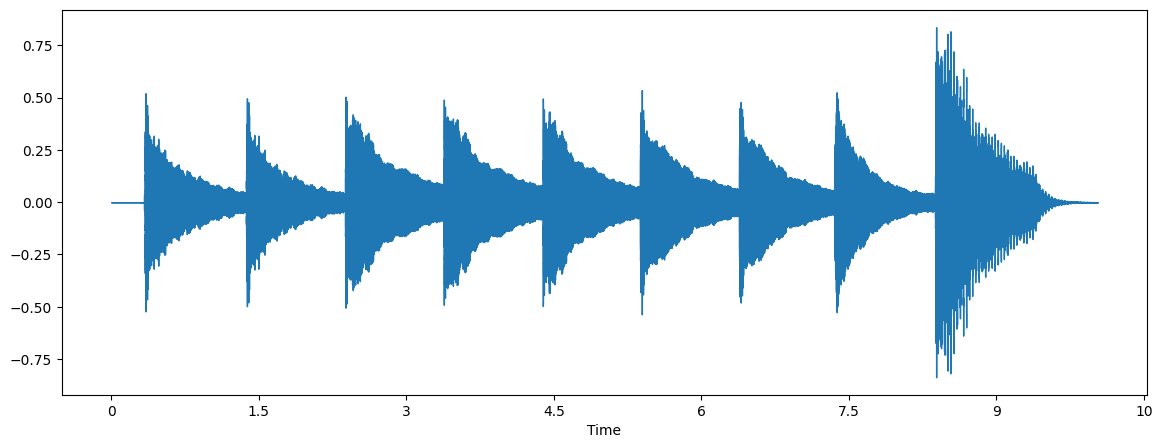

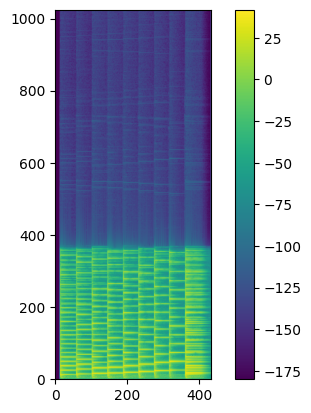

In [177]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X) + 10e-10), origin="lower")
plt.colorbar()


    1

The objective here is to minimize the following divergence:

$$
D(V||WH) = \sum_{f,t} V_{ft} \log \frac{V_{ft}}{(WH)_{ft}} - V_{ft} + (WH)_{ft}
$$

where $V$ is the data matrix of size $n \times m$, $W$ is the basis matrix of size $n \times K$ and $H$ is the activation matrix of size $K \times m$.


for a fixed $H$, we can minimize the divergence with respect to $W$ by setting the gradient:

$$
\frac{\partial D(V||WH)}{\partial W}
$$

Let's compute the gradient of the divergence with respect to $W$:

$$
\frac{\partial D(V||WH)}{\partial W_{f_{k}}} = \sum_{t} \left( ( - \frac{V_{ft}}{(WH)_{ft}} + 1 ) H_{kt}\right)
$$

Now supposing that we have the following update rule for $W$:

$$
W_{f_{k}} \leftarrow W_{f_{k}}  - \lambda_{k} \frac{\partial D(V||WH)}{\partial W_{f_{k}}}
$$
where $\lambda$ is the learning rate. This is a gradient descent, with a non-fixed learning rate, and we have an optimization problem with constraints, as the matrices $W$ and $H$ are non-negative

Then we have the following update rule for $W$:

$$
W_{f_{k}} \leftarrow W_{f_{k}}  + \lambda_{k} \sum_{t} \left( \left( \frac{V_{ft}}{(WH)_{ft}} - 1 \right) H_{kt} \right)
$$

we then suppose 
$$
W_{f_{k}} = \lambda_{k} \sum_{t} \left( H_{kt} \right)
$$

we then have a learning rate $\lambda$ :

$$
\lambda_{k} = \frac{W_{f_{k}}}{\\sum_{t} \left( H_{kt} \right)}
$$

and we get : 
$$
W_{f_{k}} \leftarrow W_{f_{k}} + \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} \sum_{t} \left( \left( \frac{V_{ft}}{(WH)_{ft}} - 1 \right) H_{kt} \right)
$$

$$
W_{f_{k}} \leftarrow W_{f_{k}} + \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} 
\sum_{t} \left( \left( \frac{V_{ft}H_{kt}}{(WH)_{ft}} - H_{kt} \right) \right)
$$

$$
W_{f_{k}} \leftarrow W_{f_{k}} + \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} 
\left( \sum_{t} \left( \frac{V_{ft}H_{kt}}{(WH)_{ft}}\right) - \sum_{t} \left(H_{kt} \right) \right) 
$$

$$
W_{f_{k}} \leftarrow W_{f_{k}} +
\left( \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} \sum_{t} \left(   \frac{V_{ft}H_{kt}}{(WH)_{ft}}\right) - \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} \sum_{t} \left( H_{kt} \right) \right) 
$$

<!-- $$
W_{f_{k}} \leftarrow W_{f_{k}} +

\left(\frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)}  \sum_{t} \left(  
\frac{V_{ft}H_{kt}}{(WH)_{ft}}\right) - \frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)} \sum_{t} \left( H_{kt} \right) \right) 
$$ -->


$$
W_{f_{k}} \leftarrow W_{f_{k}} +
\frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)}  \sum_{t} \left(  
\frac{V_{ft}H_{kt}}{(WH)_{ft}}\right) - W_{f_{k}} 
$$


And we get the update rule for $W$:

$$
W_{f_{k}} \leftarrow 
\frac{W_{f_{k}}}{\sum_{t} \left( H_{kt} \right)}  \sum_{t} \left(  
\frac{V_{ft}H_{kt}}{(WH)_{ft}}\right)
$$

## 2. Implement MUR for NMF with beta-divergence 

In [178]:
def MUR(beta, iterations, X, K, window_size):

    n, m = X.shape
    # random matrices
    W = np.random.rand(n, K)
    H = np.random.rand(K, m)

    # update phase
    for i in range(iterations):
        W = W * ( ((X * (W@H)**(beta-2) ) @ H.T) /  ( (W@H)**(beta-1) @ H.T + 10e-1) )
        H = H * ( (W.T @ (X * (W@H)**(beta-2)) ) / (W.T @ (W@H)**(beta-1)  + 10e-1 ) )
    
        
    return W, H


## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

In [179]:
# params
beta = 2
iterations = 100
K = 10
window_size = 1024
hop_size = 512

# run MUR
W, H = MUR(beta, iterations, X, K, window_size)

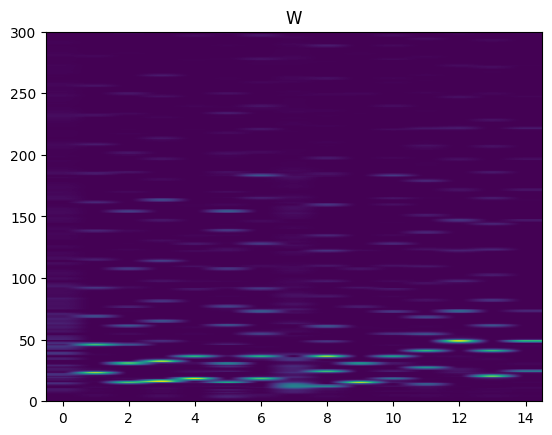

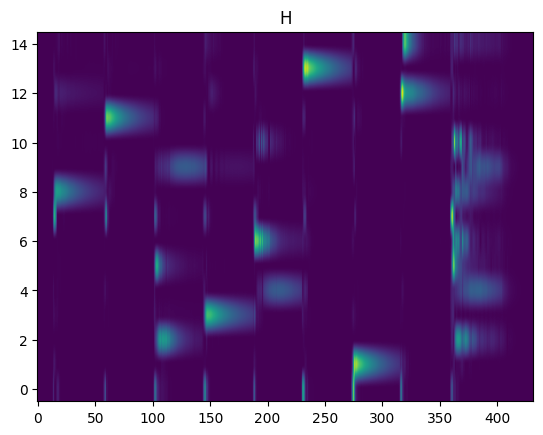

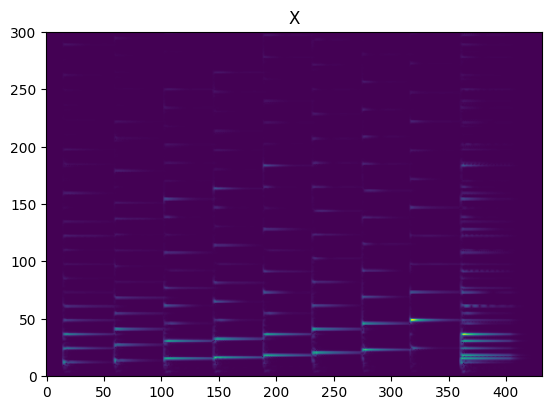

In [180]:
# show the matrices
plt.figure()
plt.imshow(W, aspect='auto')
plt.title('W')
# inverse the frequency axis
plt.gca().invert_yaxis()
#cut frequency at 300
plt.ylim(0, 300)
plt.show()

plt.figure()
plt.imshow(H, aspect='auto')
plt.title('H')
# inverse the frequency axis
plt.gca().invert_yaxis()
plt.show()

# X
plt.figure()
plt.imshow(X, origin="lower")
plt.title('X')
plt.ylim(0, 300)
plt.show()

## 4. Reconstruct each musical note separately

    some reconstructed musical notes

In [181]:
# reconstructed signal
y0 = X * ( ( W[:,0].reshape(-1,1) @ H[0,:].reshape(1,-1) ) / (W@H + 10e-20) )
y1 = X * ( ( W[:,1].reshape(-1,1) @ H[1,:].reshape(1,-1) ) / (W@H + 10e-20) )
y2 = X * ( ( W[:,2].reshape(-1,1) @ H[2,:].reshape(1,-1) ) / (W@H + 10e-20) )
y3 = X * ( ( W[:,3].reshape(-1,1) @ H[3,:].reshape(1,-1) ) / (W@H + 10e-20) )
y4 = X * ( ( W[:,4].reshape(-1,1) @ H[4,:].reshape(1,-1) ) / (W@H + 10e-20) )
# ...

In [182]:
# inverse STFT
rec0 = librosa.istft(y0, hop_length=512, win_length=None)
rec1 = librosa.istft(y1, hop_length=512, win_length=None)
rec2 = librosa.istft(y2, hop_length=512, win_length=None)
rec3 = librosa.istft(y3, hop_length=512, win_length=None)
rec4 = librosa.istft(y4, hop_length=512, win_length=None)
# ...


In [183]:
# original signal
ipd.Audio(y, rate=sr)

<Figure size 640x480 with 0 Axes>

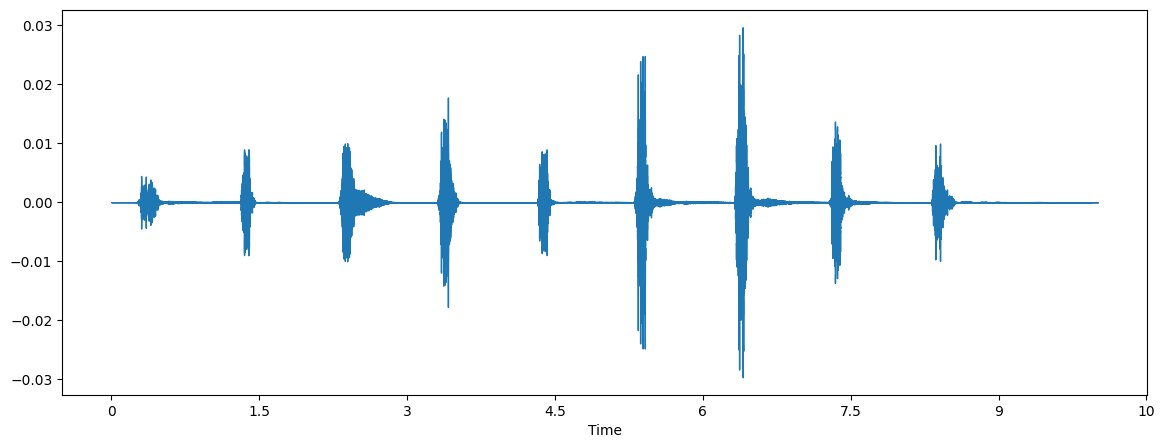

In [184]:
# listen to the reconstructed signal
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rec0, sr=sr)

ipd.Audio(rec0, rate=sr)


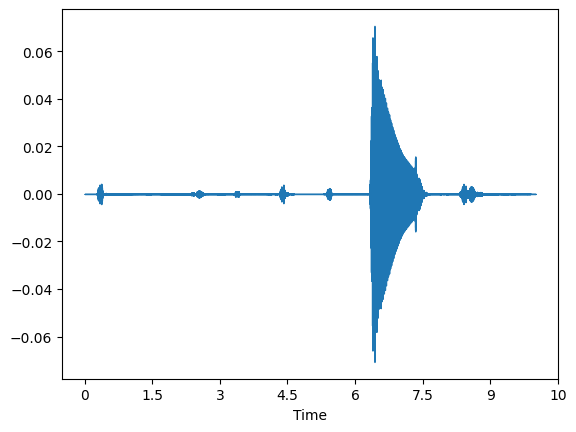

In [185]:
librosa.display.waveshow(rec1, sr=sr)
ipd.Audio(rec1, rate=sr)

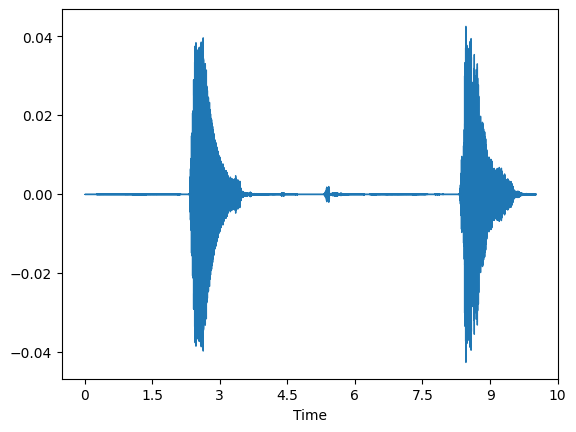

In [186]:
librosa.display.waveshow(rec2, sr=sr)
ipd.Audio(rec2, rate=sr)

In [187]:
ipd.Audio(rec4, rate=sr)

<Figure size 640x480 with 0 Axes>

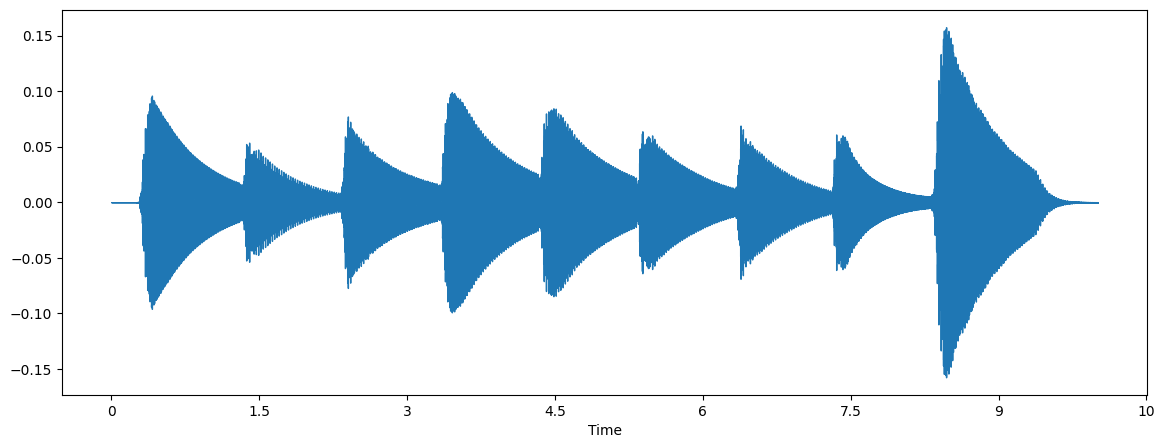

In [188]:
# reconstructing the signal
reconstruction = np.zeros_like(X)
for i in range(K):
    reconstruction += W[:,i].reshape(-1,1) @ H[i,:].reshape(1,-1)

# inverse STFT
rec = librosa.istft(reconstruction, hop_length=512, win_length=None)

# listen to the reconstructed signal
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rec, sr=sr)

ipd.Audio(rec, rate=sr)

In [189]:
# Example reconstruction
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)


    Experiments : 

When reducing the number of columns in $W$, the reconstruction is less accurate. The best result was obtained with $K = 10$. This is because the number of columns in $W$ is the number of notes we want to separate. When reducing the number of columns, the separation is less accurate, and the reconstruction is less accurate. When increasing the number of columns, the separation is more accurate.

When increasing $\beta$, the reconstruction is less accurate. The best result was obtained with $\beta = 2$.

When $\beta$ is less than 2, the method is not stable (as the divergence not convex, or numerical limits and errors). The best result was obtained with $\beta = 2$, ans when $\beta$ is greater than 2, the reconstruction is doesn't even match the number of notes we can listen to in the original audio. So $\beta$ plays a crucial role in the reconstruction.

When increasing the STFT window size, the reconstruction is more accurate. When reducing the STFT window to critical values the reconstruction is less accurate, because the window is too small to capture the harmonics of the notes, and the separation is not that bad, depending on the note but the reconstruction is less accurate and more noisy. And when increasing the STFT window size, the reconstruction is more accurate, but the separation is less accurate.

When increasing the hop size, the reconstruction is less accurate. The best result was obtained with a hop size of 512.


The best result was obtained with $\beta = 2$ and $K = 10$, with a STFT window of size 1024. ( increasing K to more than 10 doesn't really improve the construction, so we found the best trade-off between the number of notes(second dimentsion of W) and the reconstruction quality).